<a href="https://colab.research.google.com/github/lisimisa-byte/customer-purchase-behaviour/blob/main/customer_purchase_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Анализ клиентской базы и покупательского поведения для интернет-магазина одежды
- - -

## Описание данных

### Таблица `shopping_trends`

**Общее описание**: Данные предоставлены открытым ресурсом Kaggle. Таблица содержит данные о покупках клиентов в розничной торговле, включая демографическую информацию, детали покупок и предпочтения клиентов.

| Поле | Тип данных | Описание |
|------|------------|----------|
| `Customer ID` | Integer | Уникальный идентификатор клиента |
| `Age` | Integer | Возраст клиента |
| `Gender` | String | Пол клиента (Male/Female) |
| `Item Purchased` | String | название приобретенного товара |
| `Category` | String | Категория товара (Clothing, Footwear, Accessories, Outerwear) |
| `Purchase Amount (USD)` | Integer | Стоимость покупки в долларах США |
| `Location` | String | Географическое местоположение (штат США) |
| `Size` | String | Размер товара (S, M, L, XL) |
| `Color` | String | Цвет товара |
| `Season` | String | Сезон покупки (Winter, Spring, Summer, Fall) |
| `Review Rating` | Float | Рейтинг отзыва: оценка приобретенного товара клиентом (по шкале от 1 до 5) |
| `Subscription Status` | String | Статус email-подписки (Yes/No) |
| `Payment Method` | String | Способ оплаты (Credit Card, Debit Card, PayPal, etc.) |
| `Shipping Type` | String | Тип доставки (Express, Free Shipping, Standard, etc.) |
| `Discount Applied` | String | Применена ли скидка (Yes/No) |
| `Promo Code Used` | String | Использован ли промокод (Yes/No) |
| `Previous Purchases` | Integer | Количество предыдущих покупок клиента |
| `Preferred Payment Method` | String | Предпочитаемый способ оплаты клиента |
| `Frequency of Purchases` | String | Частота покупок (Weekly, Fortnightly, Monthly, Quarterly, Annually) |

---

## Ключевые особенности данных:
- **Демографические данные**: возраст, пол, местоположение
- **Детали покупок**: товар, категория, цена, размер, цвет
- **Временные атрибуты**: сезон покупки
- **Поведенческие данные**: частота покупок, история покупок
- **Предпочтения**: способы оплаты, тип доставки
- **Маркетинговые метрики**: использование скидок и промокодов, статус подписки
- - -


**Цель**: Проанализировать портреты клиентов и их поведение, чтобы понять, кто покупает, что покупает и почему. Полученные инсайты можно будет использовать для улучшения маркетинговых кампаний, управления ассортиментом и повышения удовлетворенности клиентов.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [8]:
sns.set_style('darkgrid', {'axes.facecolor':'.9', 'grid.color':'white'})

##Загрузка и предобработка данных

In [2]:
url = "https://raw.githubusercontent.com/lisimisa-byte/Custumer-Purchase-behaivour/main/shopping_trends.csv"

response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

print(f"Размер DataFrame: {df.shape}")
df.head()

Размер DataFrame: (3900, 19)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
df.duplicated().sum()

np.int64(0)

В данных отсутствуют пропуски и дубликаты.

##Анализ товаров и покупок - Что они покупают?

Text(0.5, 1.0, 'Количество покупок по категориям')

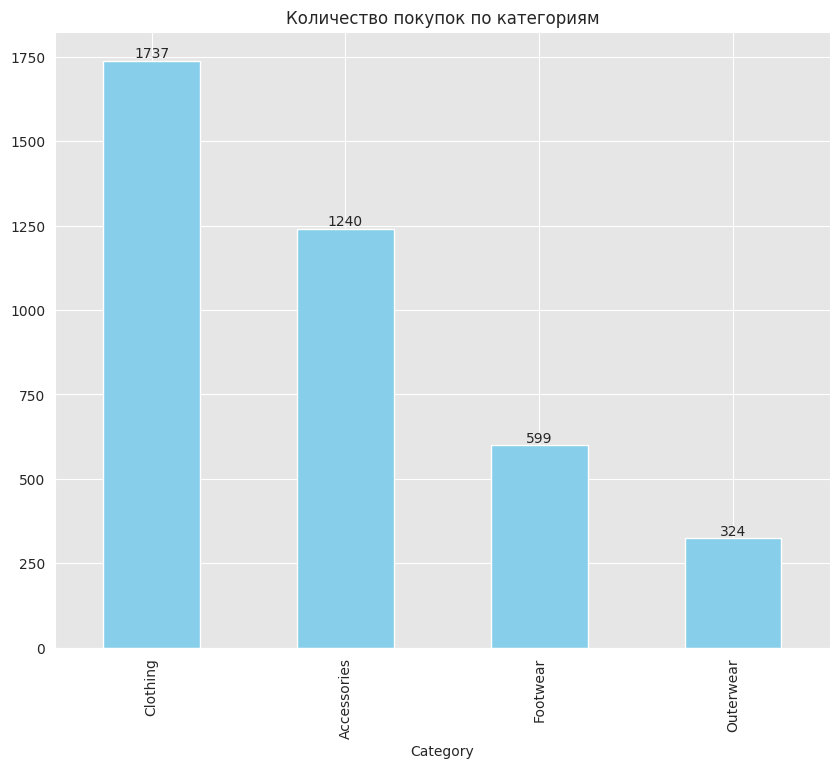

In [26]:
plt.figure(figsize=(10, 8))

df['Category'].value_counts().plot(kind='bar', color='skyblue')

for i, v in enumerate(df['Category'].value_counts()):
    plt.text(i, v + 10, f'{v}', ha='center')

plt.title('Количество покупок по категориям')
plt.show()

In [11]:
df['Item Purchased'].value_counts().head(10)

,count
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


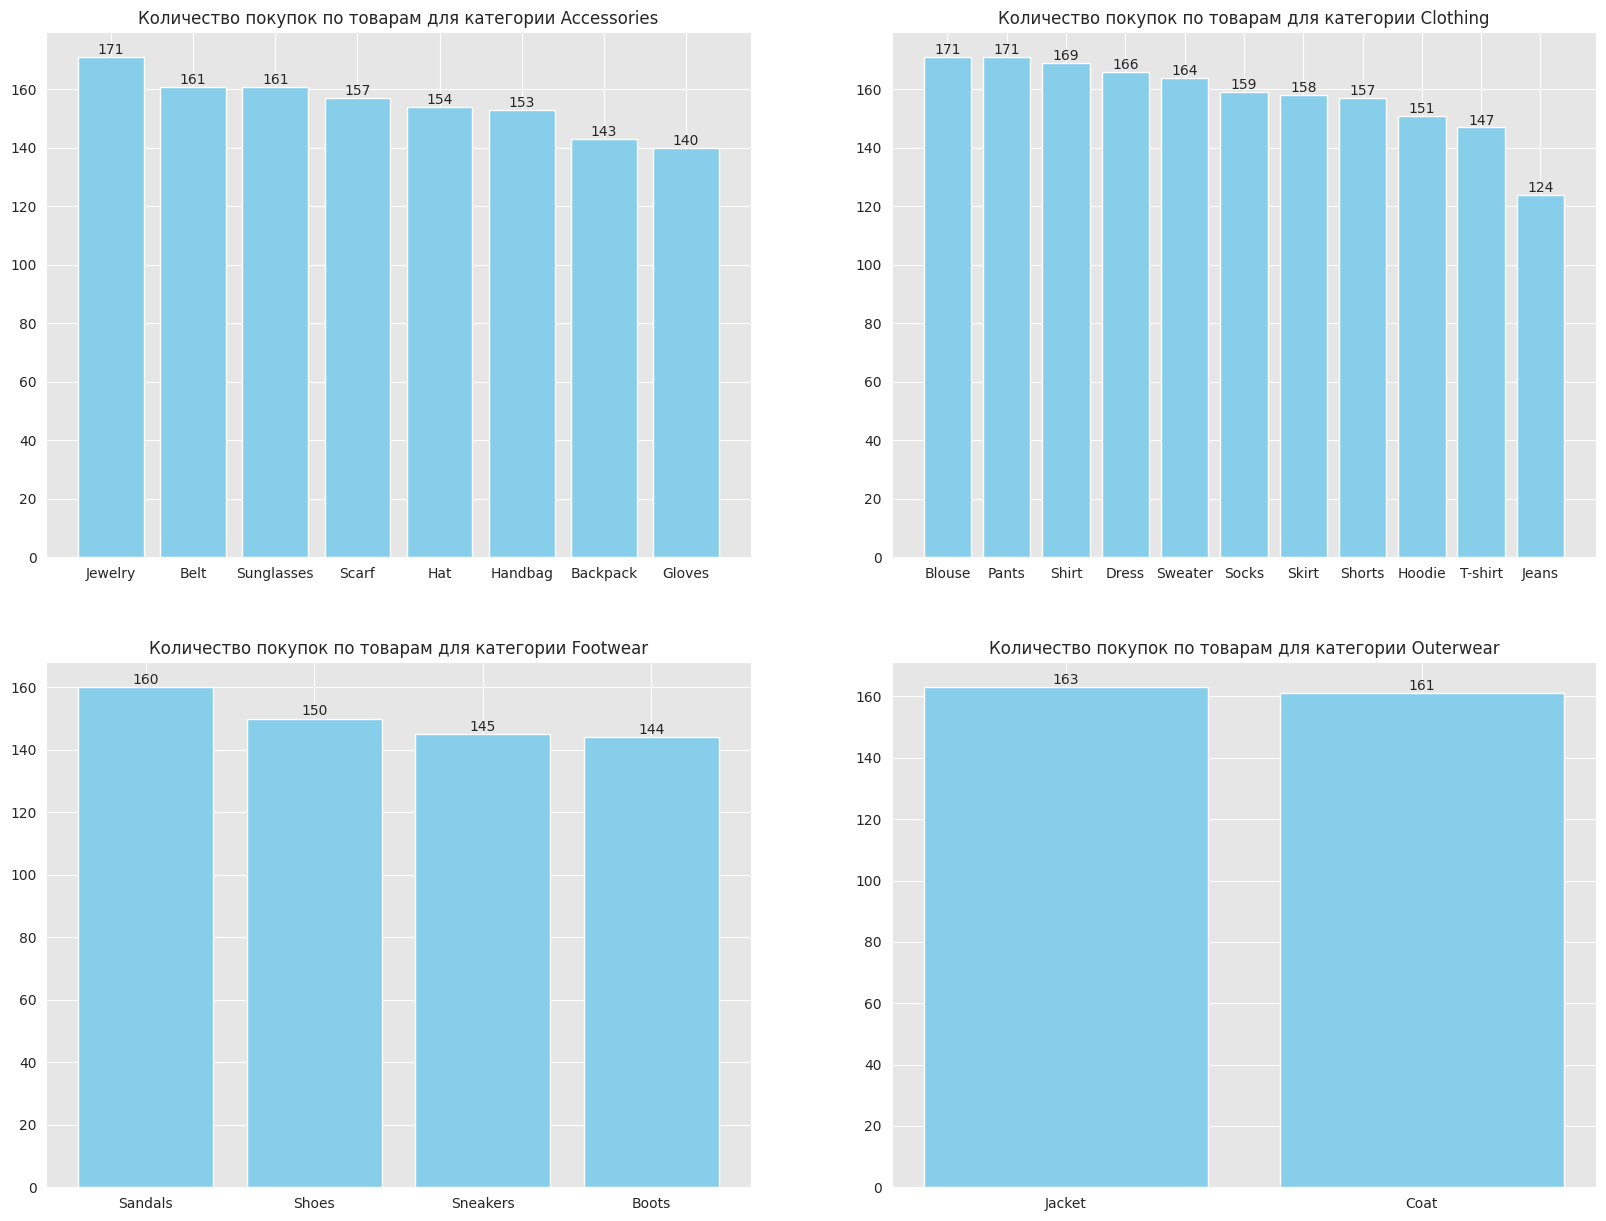

In [30]:
grouped_by_category = df.groupby('Category')['Item Purchased'].value_counts().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, category in enumerate(grouped_by_category['Category'].unique()):
  plot_data = grouped_by_category[grouped_by_category['Category'] == category]

  axes[i].bar(plot_data['Item Purchased'],
              plot_data['count'],
              color='skyblue')
  axes[i].set_title(f'Количество покупок по товарам для категории {category}')

  for j, v in enumerate(plot_data['count']):
    axes[i].text(j, v + 1, f'{v}', ha='center')

plt.show()

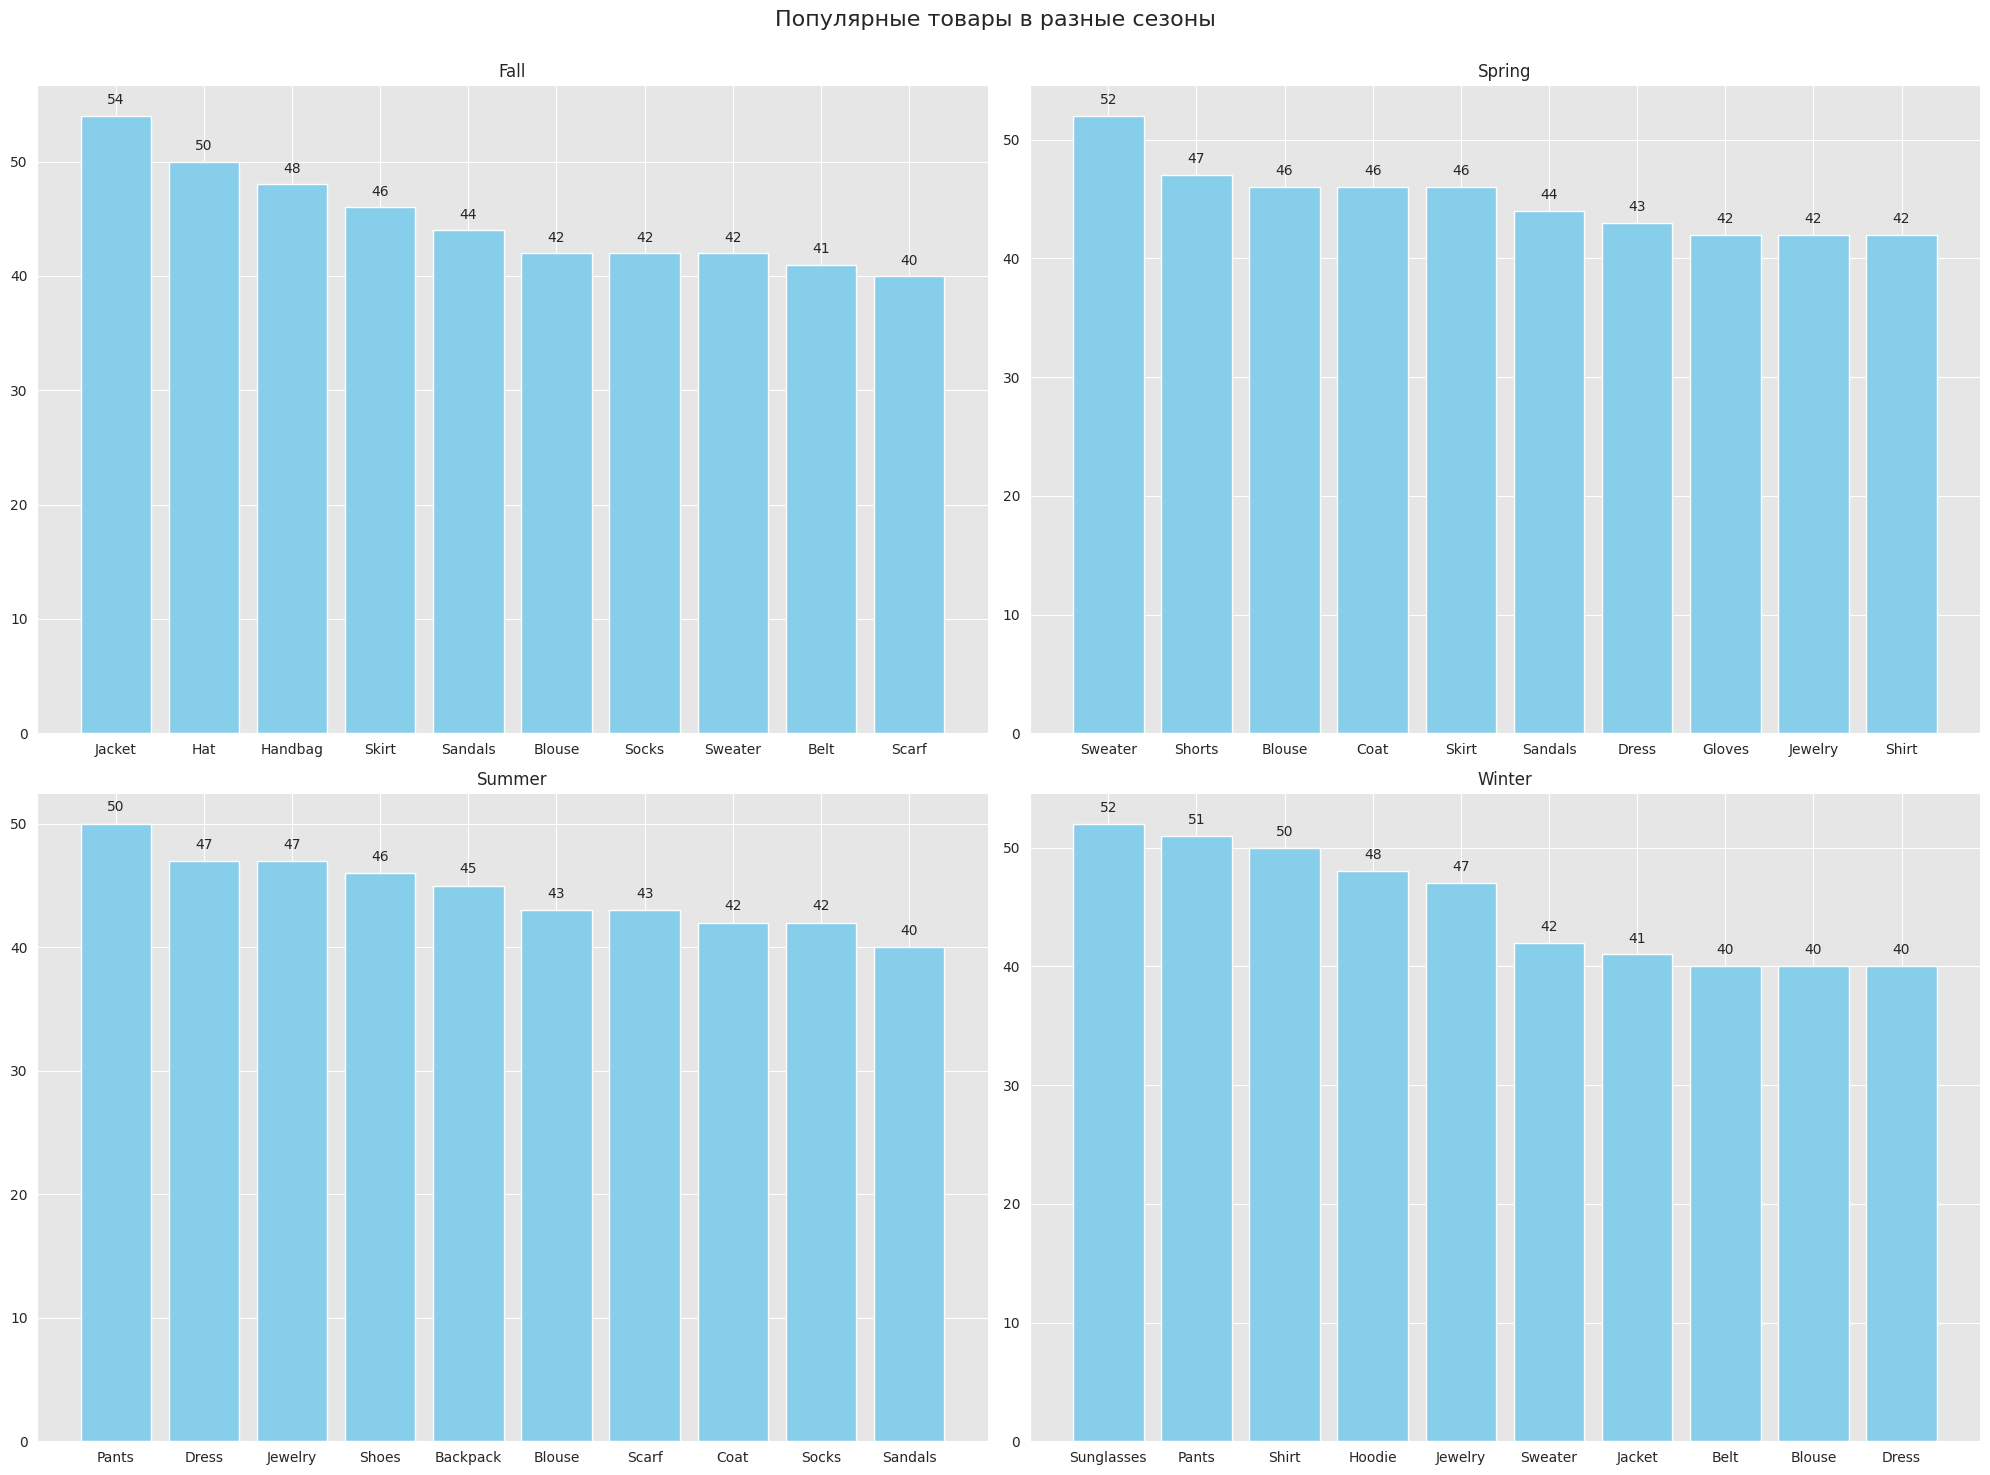

In [33]:
grouped_by_season = df.groupby('Season')['Item Purchased'].value_counts().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, season in enumerate(grouped_by_season['Season'].unique()):
  plot_data = grouped_by_season[grouped_by_season['Season'] == season].sort_values(by='count', ascending=False).head(10)

  axes[i].bar(plot_data['Item Purchased'],
              plot_data['count'],
              color='skyblue')
  axes[i].set_title(season)

  for j, v in enumerate(plot_data['count']):
    axes[i].text(j, v + 1, f'{v}', ha='center')

plt.suptitle('Популярные товары в разные сезоны', fontsize=16, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()